In [1]:
%matplotlib inline
import importlib as imp
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');

# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc , rcParams
rc('axes',edgecolor='black')
rc('xtick',color='black',labelsize=15)
rc('ytick',color='black',labelsize=15)
rc('text',color='black')
rc('axes',labelcolor='black',linewidth=2.0)
rc('font',size=15)
#rcParams["patch.force_edgecolor"] = True

import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
imp.reload(CalcABA);
import plotting_ABA_Diewertje as pltABA
imp.reload(pltABA);
import plotting_Boyle_Diewertje as plt_B
imp.reload(plt_B);

import sys 
sys.path.append('../code_general/')
import CRISPR_free_energy_landscape_Diewertje as FreeEnergy
imp.reload(FreeEnergy);
import read_model_ID;
imp.reload(read_model_ID);

import sys 
sys.path.append('../code_general_Finkelsteinlab/')
import plotting_Finkelsteinlab as plt_F
imp.reload(plt_F)


import analysis_SA_fits_Diewertje as SAfits
imp.reload(SAfits);



In [74]:
# Load data
import Prepare_data_Simple as Pre
Cas9=pd.read_csv('../Data_ABA_Finkelsteinlab/TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
Cas9
#Boyle=pd.read_csv('')

# prepare data
import Prepare_data_Simple as pre
xdata_cas9,ydata_cas9,yerr_cas9=pre.Prepare_Cdata('../Data_ABA_Finkelsteinlab/','TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')


In [75]:
import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([1,30,100])
simCas9='../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_10.txt'
ParamCas9=getParm.load_simm_anneal(simCas9,Nparams)
simCas12='../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_6.txt'
ParamCas12=getParm.load_simm_anneal(simCas12,Nparams)
simBoyle='../data/22_3_2019/fit_22_3_2019_sim_9.txt'
ParamBoyle=plt_B.load_simm_anneal(simBoyle, 43)


C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


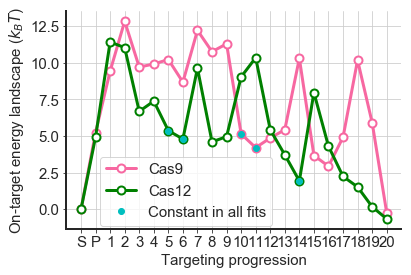

In [76]:
# plot landscapes both Cas
# --- (microscopic) free-energy landscape --- 
sims=[simCas9,simCas12]
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(sims,44,'general_energies_no_kPR')
#lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]

plt.plot(np.array(landscape.loc[simCas9]), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='Cas9');

plt.plot(np.array(landscape.loc[simCas12]), color='green' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='Cas12');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(landscape.loc[simCas9].index[2:]),  fontsize=15);
plt.plot([6,7,15,11,12],[landscape.loc[simCas12][6],landscape.loc[simCas12][7],
                         landscape.loc[simCas12][15],landscape.loc[simCas9][11],landscape.loc[simCas9][12]],
         color='c',marker='o',ls='',label='Constant in all fits')
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();
plt.legend(fontsize=15,loc=[0.1,0.015])


In [77]:
ParamCas12[0]

4.93929946793

In [78]:
landscape.loc[simCas12][6]

5.365751742963999

In [79]:
def plot_single_mut_ABA(data, Mut_type, data_name='Finkelstein Data', Canonical=True, Plot=True):

    Mut_names = {'r':'Mismatch', 'i':'Insertion', 'd': 'Deletion'}
    Mut_name = Mut_names[Mut_type]
    
    data['Mutation Type'].fillna('', inplace=True)
    single_mut_data = data[(data['Canonical']==Canonical)&(data['Mutation Type']==Mut_type)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    single_mut_data['Position'] = single_mut_data['Mutation ID'].apply(lambda x: int(x.split(':')[1]))
    single_mut_data_mean = single_mut_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position').mean().reset_index()
    
    if Plot:
        single_mut_data_mean.plot(x='Position', y='Delta ABA (kBT)',yerr='Uncertainty', marker='o', linewidth=1, color='blue') 
        plt.xlabel(Mut_name+' postion', fontsize=15)
        plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
        if not Canonical:
            plt.title(data_name + ' - Noncanonical',fontsize=15)
    
    return single_mut_data_mean

def plot_double_mut_ABA(data, Mut_type, data_name='Finkelstein Data', Canonical=True, Plot=True):
    
    Mut_names = {'r':'Mismatch', 'i':'Insertion', 'd': 'Deletion'}
    Mut_name = Mut_names[Mut_type]
    Mut_type_str = Mut_type+'|'+Mut_type
    
    data['Mutation Type'].fillna('', inplace=True)
    double_mut_data = data[(data['Canonical']==Canonical)&(data['Mutation Type']==Mut_type_str)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    double_mut_data['Position'] = double_mut_data['Mutation ID'].apply(lambda x: '|'.join(map(lambda y: y.split(':')[1], x.split('|'))))
    double_mut_data_mean = double_mut_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position').mean().reset_index()

    Ng = 20;
    double_mut_map = np.empty((Ng,Ng))
    double_mut_map[:] = np.nan
    for n in range(len(double_mut_data_mean)):
        pos = double_mut_data_mean['Position'].iloc[n]
        Positions = list(map(lambda x: int(x)-1, pos.split('|')))
        double_mut_map[Positions[1],Positions[0]] = double_mut_data_mean['Delta ABA (kBT)'].iloc[n]
        
    if Plot:    
        plt.figure()
        sns.heatmap(double_mut_map, cmap='coolwarm',cbar=True,vmin=0,vmax=double_mut_data_mean['Delta ABA (kBT)'].max())
        plt.xlabel(Mut_name+' 1', fontsize=15)
        plt.ylabel(Mut_name+' 2', fontsize=15)
        plt.title('$\Delta$ABA - '+data_name,fontsize=15)
        if not Canonical:
            plt.title('$\Delta$ABA - '+data_name+' - Noncanonical',fontsize=15)
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)),ax.get_xticks()+0.5)));
        ax.set_yticklabels(list(map(lambda x: str(int(x)),ax.get_yticks()+0.5)));
    
    return double_mut_data_mean, double_mut_map

def make_block_ID(MM_pos_list):
    
    bi = MM_pos_list[0]
    bf = MM_pos_list[-1]
    block = np.arange(bi,bf+1)
    if (len(block)!=len(MM_pos_list)) or np.any(block!=np.array(MM_pos_list)):
        return ''
    return '|'.join(list(map(str, [bi, bf])))

def plot_block_mm_ABA(data, data_name='Finkelstein Data', Canonical=True, Plot=True):
    
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    block_mm_data_mean = multi_mm_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position').mean().reset_index()

    Ng = 20;
    block_mm_map = np.empty((Ng,Ng))
    block_mm_map[:] = np.nan
    for n in range(len(block_mm_data_mean)):
        pos = block_mm_data_mean['Position'].iloc[n]
        Positions = list(map(lambda x: int(x)-1, pos.split('|')))
        block_mm_map[Positions[0],Positions[1]] = block_mm_data_mean['Delta ABA (kBT)'].iloc[n]

    if Plot:
        plt.figure()
        sns.heatmap(block_mm_map, cmap='coolwarm',cbar=True,vmin=2,vmax=5) #=block_mm_data_mean['Delta ABA (kBT)'].max())
        #plt.xlabel('Block end', fontsize=15)
        #plt.ylabel('Block start', fontsize=15)
        plt.title('$\Delta$ABA - '+data_name,fontsize=15)
        if not Canonical:
            plt.title('$\Delta$ABA - '+data_name+' - Noncanonical',fontsize=15)
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)),ax.get_xticks()+0.5)));
        ax.set_yticklabels(list(map(lambda x: str(int(x)),ax.get_yticks()+0.5)));
    
    block_start_mm_data = block_mm_data_mean.set_index('Position').groupby(lambda x: int(x.split('|')[0])).mean().reset_index().rename(columns={'index':'Block start'})
    
    if Plot:
        block_start_mm_data.plot(x='Block start', y='Delta ABA (kBT)',yerr='Uncertainty', marker='o', linewidth=1, color='blue') 
        #plt.xlabel('Block start', fontsize=15)
        #plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
        if not Canonical:
            plt.title(data_name+' - Noncanonical',fontsize=15)
    
    return block_mm_data_mean, block_mm_map, block_start_mm_data

def plot_block_mm_ABA_WA(data, data_name='Finkelstein Data', Canonical=True, Plot=True):
    
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    block_mm_data_mean = multi_mm_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position')
    ydata=[]
    yerr=[]
    pos=[]
    for blockID, group in block_mm_data_mean:
        yvals=[]
        yerval=[]
        for i in range(len(group)):
            yvals.append(group['Delta ABA (kBT)'].iloc[i])
            yerval.append(group['Uncertainty'].iloc[i])
        pos.append(group['Position'].iloc[i])
        ydata.append(yvals)
        yerr.append(yerval)

    wa=[]
    for i in range(len(pos)):
        y = np.array(ydata[i])
        e = np.array(yerr[i])
        wa.append(np.average(y, weights=e ** -2, axis=0))

    block_mm_data_mean=pd.DataFrame({'Position':pd.Series(pos),'Delta ABA (kBT)':pd.Series(wa)})
    
    Ng = 20;
    block_mm_map = np.empty((Ng,Ng))
    block_mm_map[:] = np.nan
    
    block_start_mm_data = pd.DataFrame(block_mm_data_mean).set_index('Position').groupby(lambda x: int(x.split('|')[0])).mean().reset_index().rename(columns={'index':'Block start'})
    if Plot:
        block_start_mm_data.plot(x='Block start', y='Delta ABA (kBT)', marker='o', linewidth=1, color='blue') 
        #plt.xlabel('Block start', fontsize=15)
        #plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
        if not Canonical:
            plt.title(data_name+' - Noncanonical',fontsize=15)
    
    return block_mm_data_mean, block_mm_map, block_start_mm_data

def plot_block_mm_ABA_WA_raw(data, data_name='Finkelstein Data', Canonical=True, Plot=True):
    
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    block_mm_data_mean = multi_mm_data[['Position', 'ABA', 'error']].groupby('Position')
    ydata=[]
    yerr=[]
    pos=[]
    for blockID, group in block_mm_data_mean:
        yvals=[]
        yerval=[]
        for i in range(len(group)):
            yvals.append(group['Delta ABA (kBT)'].iloc[i])
            yerval.append(group['Uncertainty'].iloc[i])
        pos.append(group['Position'].iloc[i])
        ydata.append(yvals)
        yerr.append(yerval)

    wa=[]
    for i in range(len(pos)):
        y = np.array(ydata[i])
        e = np.array(yerr[i])
        wa.append(np.average(y, weights=e ** -2, axis=0))

    block_mm_data_mean=pd.DataFrame({'Position':pd.Series(pos),'Delta ABA (kBT)':pd.Series(wa)})
    
    Ng = 20;
    block_mm_map = np.empty((Ng,Ng))
    block_mm_map[:] = np.nan
    
    block_start_mm_data = pd.DataFrame(block_mm_data_mean).set_index('Position').groupby(lambda x: int(x.split('|')[0])).mean().reset_index().rename(columns={'index':'Block start'})
    
    return block_mm_data_mean, block_mm_map, block_start_mm_data


def plot_mut_PAM_ABA(data, data_name='Finkelstein Data', Plot=True):
    
    data['Mutation Type'].fillna('', inplace=True)
    data['Alignment'].fillna('', inplace=True)
    NonCanonical = data[(data['Canonical']==False)&(data['Alignment']!='')&(data['Mutation Type']=='')][['PAM', 'Delta ABA (kBT)', 'Uncertainty']].groupby('PAM').mean()
    
    if Plot:
        bar_width = 0.35
        plt.figure(figsize=(20,6))
        plt.bar(np.arange(len(NonCanonical)), NonCanonical['Delta ABA (kBT)'], width=bar_width)
        ax = plt.gca()
        ax.set_xticks(np.arange(len(NonCanonical))+0.5*bar_width);
        ax.set_xticklabels(NonCanonical.index, rotation='vertical');
        #plt.xlabel('PAM', fontsize=15)
        #plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
    
    return NonCanonical

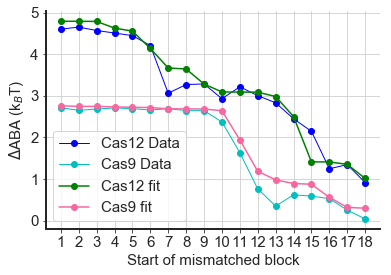

In [101]:
model_id='general_energies_no_kPR'
guide_length=20
concentrations9=np.array([0.1,0.3,10,30,100,300])
ontarget_ABA_12 = CalcABA.calc_ABA(ParamCas12, concentrations, reference=1,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
energy_block12=[]
epsilon = ParamCas12[:-2]
energy_block12_eq=[]
for mmStart in range(1,21):
    block=np.arange(mmStart,21)
    energies=CalcABA.get_energies(epsilon,block, guide_length)
    energy_block12_eq.append(-np.log(np.sum(np.exp(-np.cumsum(energies))))-ontarget_ABA_12)  
    energy_block12.append(CalcABA.calc_delta_ABA(ParamCas12,concentrations,1,block,ontarget_ABA_12,model_id=model_id,guide_length=guide_length,T=10*60))

ontarget_ABA_9 = CalcABA.calc_ABA(ParamCas9, concentrations9, reference=1,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
energy_block9=[]
energy_block9_eq=[]
epsilon9 = ParamCas9[:-2]
#epsilon9[0]=3.5
for mmStart in range(1,21):
    block=np.arange(mmStart,21)
    energies9=CalcABA.get_energies(epsilon9,block, guide_length)
    energy_block9_eq.append(-np.log(np.sum(np.exp(-np.cumsum(energies9))))-ontarget_ABA_9) 
    energy_block9.append(CalcABA.calc_delta_ABA(ParamCas9,concentrations9,1,block,ontarget_ABA_9,model_id=model_id,guide_length=guide_length,T=10*60))


Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
filename_3 = 'cas12a-target-d-replicate-1-delta-abas-processed.csv'
data_cas12a_d1 = pd.read_csv(Path+filename_3)
_, block_cas12a_d, block_start_cas12_d2 = plot_block_mm_ABA(data_cas12a_d1, data_name='Cas 12a - target d - replica 1', Canonical=True, Plot=False)
_, block_cas12a_d_WA, block_start_cas12_d2_WA = plot_block_mm_ABA_WA(data_cas12a_d1, data_name='Cas 12a - target d - replica 1', Canonical=True, Plot=False)
plt.plot(block_start_cas12_d2_WA['Block start'], block_start_cas12_d2_WA['Delta ABA (kBT)'], marker='o', linewidth=1, color='blue',label='Cas12 Data') 


Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
filename_1 = 'cas9-target-e-replicate-1-delta-abas-processed.csv'
data_cas9_e1 = pd.read_csv(Path+filename_1)
_, block_cas9_e1, block_start_cas9_e1 = plot_block_mm_ABA(data_cas9_e1, data_name='Cas 9 - target e', Canonical=True, Plot=False)
plt.plot(block_start_cas9_e1['Block start'], block_start_cas9_e1['Delta ABA (kBT)'], marker='o', linewidth=1, color='c',label='Cas9 Data') 


plt.plot(range(1,19),energy_block12[:-2],marker='o',label='Cas12 fit',color='green')
plt.plot(range(1,19),energy_block9[:-2],marker='o',label='Cas9 fit',color='#f768a1')
#plt.plot(range(1,19),energy_block9_eq[:-2],marker='o',label='Cas9 fit eq',color='blue')

plt.ylabel('$\Delta$ABA (k$_B$T)')
plt.xlabel('Start of mismatched block')
plt.xticks(range(1,19))
plt.legend()
plt.grid()
sns.despine();

# Cas 12 is target e
# Cas 9 is target d

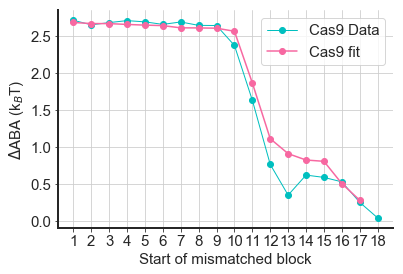

In [99]:
model_id='general_energies_no_kPR'
concentrations=np.array([1,30,100])
guide_length=20
# ontarget_ABA_12 = CalcABA.calc_ABA(ParamCas12, concentrations, reference=1,
#                                     mismatch_positions=[],
#                                     model_id=model_id,
#                                     guide_length=20,
#                                     T=60 * 10)
# energy_block12=[]
# epsilon = ParamCas12[:-2]
# energy_block12_eq=[]
# for mmStart in range(1,21):
#     block=np.arange(mmStart,21)
#     energies=CalcABA.get_energies(epsilon,block, guide_length)
#     energy_block12_eq.append(-np.log(np.sum(np.exp(-np.cumsum(energies))))-ontarget_ABA_12)  
#     energy_block12.append(CalcABA.calc_delta_ABA(ParamCas12,concentrations,1,block,ontarget_ABA_12,model_id=model_id,guide_length=guide_length,T=10*60))

concentrations9=np.array([0.1,0.3,1,3,10,30,100,300])
ontarget_ABA_9 = CalcABA.calc_ABA(ParamCas9, concentrations9, reference=1,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
energy_block9=[]
energy_block9_eq=[]
epsilon9 = ParamCas9[:-2]
#epsilon9[0]=3.5
for mmStart in range(1,21):
    block=np.arange(mmStart,21)
    energies9=CalcABA.get_energies(epsilon9,block, guide_length)
    energy_block9_eq.append(-np.log(np.sum(np.exp(-np.cumsum(energies9))))-ontarget_ABA_9) 
    energy_block9.append(CalcABA.calc_delta_ABA(ParamCas9,concentrations9,1,block,ontarget_ABA_9,model_id=model_id,guide_length=guide_length,T=10*60))


# Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
# filename_3 = 'cas12a-target-d-replicate-1-delta-abas-processed.csv'
# data_cas12a_d1 = pd.read_csv(Path+filename_3)
# _, block_cas12a_d, block_start_cas12_d2 = plot_block_mm_ABA(data_cas12a_d1, data_name='Cas 12a - target d - replica 1', Canonical=True, Plot=False)
# _, block_cas12a_d_WA, block_start_cas12_d2_WA = plot_block_mm_ABA_WA(data_cas12a_d1, data_name='Cas 12a - target d - replica 1', Canonical=True, Plot=False)
# plt.plot(block_start_cas12_d2_WA['Block start'], block_start_cas12_d2_WA['Delta ABA (kBT)'], marker='o', linewidth=1, color='blue',label='Cas12 Data') 


Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
filename_1 = 'cas9-target-e-replicate-1-delta-abas-processed.csv'
data_cas9_e1 = pd.read_csv(Path+filename_1)
_, block_cas9_e1, block_start_cas9_e1 = plot_block_mm_ABA(data_cas9_e1, data_name='Cas 9 - target e', Canonical=True, Plot=False)
plt.plot(block_start_cas9_e1['Block start'], block_start_cas9_e1['Delta ABA (kBT)'], marker='o', linewidth=1, color='c',label='Cas9 Data') 


# plt.plot(range(1,19),energy_block12[:-2],marker='o',label='Cas12 fit',color='green')
plt.plot(range(1,18),energy_block9[:-3],marker='o',label='Cas9 fit',color='#f768a1')
#plt.plot(range(1,19),energy_block9_eq[:-2],marker='o',label='Cas9 fit eq',color='blue')

plt.ylabel('$\Delta$ABA (k$_B$T)')
plt.xlabel('Start of mismatched block')
plt.xticks(range(1,19))
plt.legend()
plt.grid()
sns.despine();

# Cas 12 is target e
# Cas 9 is target d

In [88]:
ontarget_ABA_9

2.2252597636952443

In [40]:
energies=CalcABA.get_energies(epsilon,[], guide_length)
np.cumsum(energies)-(4.93929947-3.5)

array([ 3.5       ,  9.9711871 ,  9.58974447,  5.23859589,  5.93884518,
        3.92645227,  3.35540973,  8.18400681,  3.16414682,  3.51451282,
        7.59306597,  8.90080648,  3.98809555,  2.27755198,  0.49702837,
        6.52375163,  2.8658867 ,  0.80520832,  0.08669345, -1.26304731,
       -2.09430063])

In [97]:
concentrations

array([  1,  30, 100])

# Compare Cas9 with Boyle

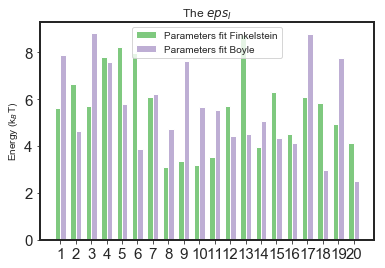

In [4]:
width=0.35
ind= np.arange(1,len(ParamCas12)-1-21)

fig,ax=plt.subplots()
ax.bar(ind-width/2,ParamCas12[21:-2],width,label='Parameters fit Finkelstein')
ax.bar(ind+width/2,ParamBoyle[21:-2],width,label='Parameters fit Boyle')
#plt.scatter(range(len(ParamBoyle)-2),ParamBoyle[:-2],marker='_',color='blue',label='Parameters fit Boyle')
ax.set_ylabel('Energy (k$_B$T)')
ax.set_title('The $eps_I$')
ax.set_xticks(ind)
ax.legend()

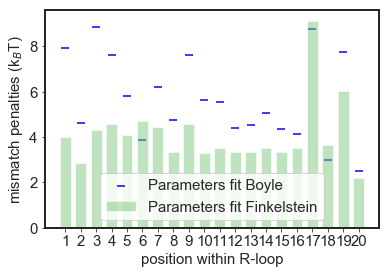

In [40]:
width=0.7
ind= np.arange(1,len(ParamCas9)-1-21)
import seaborn

plt.bar(ind,ParamCas9[21:-2],width,label='Parameters fit Finkelstein',alpha=0.5)
plt.scatter(ind,ParamBoyle[21:-2],s=50,marker='_',color='blue',label='Parameters fit Boyle')
plt.ylabel('mismatch penalties (k$_B$T)',fontsize=15)
plt.xlabel('position within R-loop',fontsize=15)
#plt.title('The mismatch penalties ($\epsilon_C$)',fontsize=15)
plt.xticks(ind)
plt.legend(fontsize=15,loc=8)

In [44]:
import Boyle_data_processing as Bdata
import plotting_Boyle_Diewertje as plt_B
fldr_Boyle_data = '../Data_Boyle/Weighted_Avarage/'

dataOTonR=2.888400000000000060e-04
Pbound_OT,modelOTonR,_=plt_B.calc_Boyle(CalcOccupancy=True,CalcOffRate=False,
                            CalcOnRate=True, parameters=ParamCas9,
                            mismatch_positions=[],model_id=model_id)
modelOTonR

7.484609450031875e-05

In [45]:
Pb_pred,on_pred,off_pred=plt_B.calc_predictions(ParamCas9,model_id)
on_pred=on_pred/modelOTonR

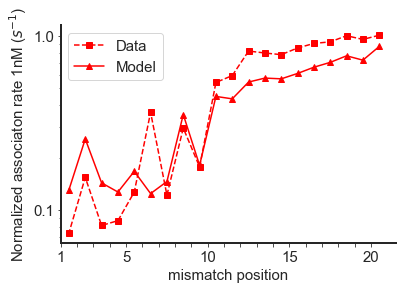

In [46]:
model,data=plt_B.plot_single_mismatches(on_pred,'OnRate',fldr_Boyle_data,False,None)
positions = 20 - np.arange(0,20)
plt.semilogy(positions, data/dataOTonR, linestyle='dashed', marker='s', color='red',label='Data')
plt.plot(positions, model, linestyle='solid', marker='^', color='red', label='Model')
ax=plt.gca()
ylabel = r'Normalized associaton rate 1nM ($s^{-1}$)'



positions = 20 - np.arange(0,20)
ax.set_xlim(1, 21)
ax.set_xlabel('mismatch position', fontsize=15)
ax.set_ylabel(ylabel, fontsize=15)
ax.set_xticks([i + 0.5 for i in range(20)])
ax.set_xticklabels([1, '', '', '', 5, '', '', '', '', 10, '', '', '', '', 15, '', '', '', '', 20],
                   rotation=0,
                   fontsize=15);
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.legend(loc='best', fontsize=12, frameon=True)
sns.despine(ax=ax)
ax=plt.gca()
plt.legend()


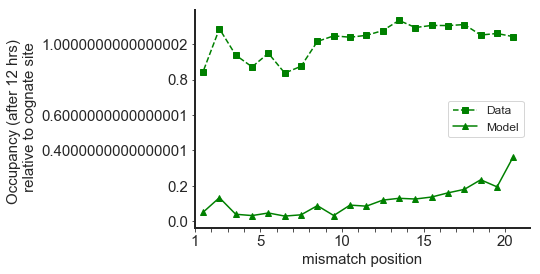

In [47]:
plt.figure()
_,_ = plt_B.plot_single_mismatches(Pb_pred ,kind='Occupancy')
# data OT = 1, so is already normalised
# model is also already relative to the ontarget

In [48]:
Pbound_OT

0.579706070934122

Text(0.5, 1.0, 'Prediction (top) / Data (bottom)')

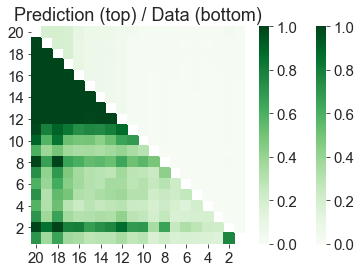

In [49]:
Pmodel,Pdata = plt_B.plot_heatmap(Pb_pred ,kind='Occupancy',show_plot=False)
sns.heatmap(Pdata,cmap='Greens',mask=np.triu(Pdata),vmin=0,vmax=1)
sns.heatmap(Pmodel,cmap='Greens',mask=np.tril(Pmodel),vmin=0,vmax=1)
ax=plt.gca()
ax.set_xticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);

ax.set_xticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
plt.title('Prediction (top) / Data (bottom)')

Text(0.5, 1.0, '10 min (top) / 12 hours (bottom)')

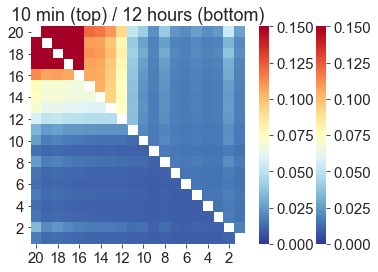

In [50]:
def calc_predictions(parameters,model_id):
    '''
    Predict occupancy (12 hrs), on-rate and off-rate for all combinations of two mismachtes
    Uses 'CRISPR_dCas9_binding_curve_Boyle' module

    :param parameters: (fitted) set of relevant/free epsilon and rate values
    :param model_id: naming used to unpack parameter set/ interpret energy landscape
    :return: three matrices. Diagonals contain single-mismatches
    '''
    on_rate_predict = np.zeros([20, 20])
    off_rate_predict = np.zeros([20, 20])
    Pbound_predict = np.zeros([20, 20])
    Pbound_OT, _, _ = calc_Boyle(True, False, False, parameters, [],model_id=model_id)
    for i in range(0, 20):
        for j in range(0, 20):
            mismatch_positions = [20 - i, 20 - j]
            if i == j:
                mismatch_positions = [20 - i]
            predictions = calc_Boyle(True, False, False, parameters, mismatch_positions,model_id=model_id)
            Pbound_predict[i, j] = predictions[0] / Pbound_OT
    return Pbound_predict, on_rate_predict, off_rate_predict

def calc_Boyle(CalcOccupancy, CalcOffRate, CalcOnRate,
               parameters, mismatch_positions, guide_length=20, model_id='general_energies'):
    '''
    :param CalcOccupancy: boolian True if you want to calculate occupancy after 12 hrs
    :param CalcOffRate: boolian, True if you want to calculate dissocation rate
    :param CalcOnRate:  boolian, True if you want to calculate association rate
    :return:
    '''
    # 0) Initialize output (in case I do not want to calculate all 3:
    bound_fraction = float('nan')
    dissociation_rate = float('nan')
    association_rate = float('nan')

    # 1) Unpack parameters and build rate matrix to be used in all types of calculations
    rate_matrix = CalcABA.get_master_equation(parameters, mismatch_positions, model_id, guide_length)

    #2) Do I want (need) the occupancy after 12 hours?
    if CalcOccupancy or CalcOffRate:
        everything_unbound = np.array([1.0] + [0.0] * (guide_length + 1))
        Probability = CalcABA.get_Probability(rate_matrix=rate_matrix,initial_condition=everything_unbound,T=12*600)
        bound_fraction = np.sum(Probability[1:])

    #3) Do I want the dissociation rate ?
    if CalcOffRate:
        dissociation_rate = calc_dissociation_rate(rate_matrix=rate_matrix,
                                                 initial_condition=Probability,timepoints=[500.,1000.,1500.])
    #4) Do I want the association rate?
    if CalcOnRate:
        association_rate = calc_association_rate(rate_matrix=rate_matrix,timepoints=[500.,1000.,1500.],
                                                 guide_length=guide_length)

    return bound_fraction, association_rate, dissociation_rate

P10min,_,_=calc_predictions(ParamCas9,model_id)

sns.heatmap(Pmodel,cmap='RdYlBu_r',mask=np.triu(Pmodel),vmin=0,vmax=0.15)
sns.heatmap(P10min,cmap='RdYlBu_r',mask=np.tril(P10min),vmin=0,vmax=0.15)
ax=plt.gca()
ax.set_xticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);

ax.set_xticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
plt.title('10 min (top) / 12 hours (bottom)')

Text(0.5, 1.0, '10 min (top) / 12 hours (bottom)')

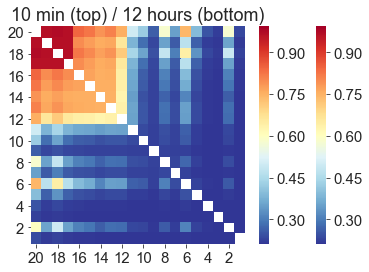

In [238]:
# everything for Boyle
Pb_pred,on_pred,off_pred=plt_B.calc_predictions(ParamBoyle,model_id)
Pmodel,Pdata = plt_B.plot_heatmap(Pb_pred ,kind='Occupancy',show_plot=False)
P10min,_,_=calc_predictions(ParamBoyle,model_id)

sns.heatmap(Pmodel,cmap='RdYlBu_r',mask=np.triu(Pmodel))
sns.heatmap(P10min,cmap='RdYlBu_r',mask=np.tril(P10min))
ax=plt.gca()
ax.set_xticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);

ax.set_xticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
plt.title('10 min (top) / 12 hours (bottom)')

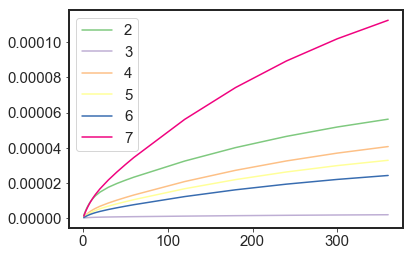

In [264]:
# occupancy curve over time for mmps(12,19)
everything_unbound = np.array([1.0] + [0.0] * (guide_length + 1))
rate_matrix=CalcABA.get_master_equation(ParamCas9,[12,19],model_id,20)
T=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50,60,120,180,240,300,360]
for i in range(2,8):
    Plooptime=[]
    for t in T:
        Plooptime.append(CalcABA.get_Probability(rate_matrix,everything_unbound,t)[i])
    plt.plot(T,Plooptime,label=i)
plt.legend()

In [231]:
np.where((P10min-Pmodel)==0)

# a=np.array([1,1,0,1,0,3,4])
# b=np.where(a==0)

(array([], dtype=int64), array([], dtype=int64))

Text(29.0, 0.5, 'mismatch 2')

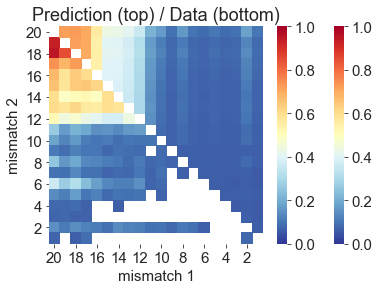

In [51]:
Dmodel,Ddata=plt_B.plot_heatmap(on_pred,'OnRate',fldr_Boyle_data,False,None,True)
colormap = 'RdYlBu_r' #'Reds'
ax=plt.gca()
sns.heatmap(Ddata/dataOTonR, cmap=colormap, mask=np.triu(Ddata/dataOTonR),vmin=0,vmax=1);
sns.heatmap(Dmodel, cmap=colormap, mask=np.tril(Dmodel),vmin=0,vmax=1); # already devided by ontarget in on_pred
# ax.set_yticklabels(map(lambda x: str(int(20-x)), ax.get_yticks() - 0.5));
# ax.set_xticklabels(map(lambda x: str(int(x+1)), ax.get_xticks() - 0.5));
ax.set_xticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
plt.title('Prediction (top) / Data (bottom)')

ax.set_xlabel('mismatch 1', fontsize=15)
ax.set_ylabel('mismatch 2', fontsize=15)

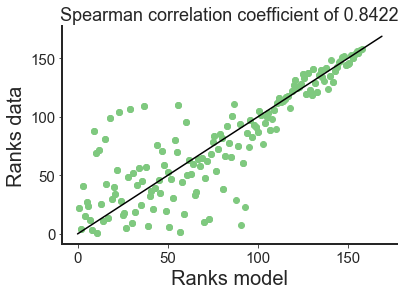

In [97]:
reshaped_Dmodel=Dmodel.reshape(400)
reshaped_Ddata=Ddata.reshape(400)
reshaped_Dmodel=reshaped_Dmodel[~np.isnan(reshaped_Ddata)]
reshaped_Ddata=reshaped_Ddata[~np.isnan(reshaped_Ddata)]
from scipy import stats
rank_model=stats.rankdata(reshaped_Dmodel,method='dense')
rank_data=stats.rankdata(reshaped_Ddata,method='dense')
plt.scatter(rank_model,rank_data)
plt.xlabel('Ranks model',fontsize=20)
plt.ylabel('Ranks data',fontsize=20)
plt.plot(range(170),color='black')

spearman_corr = np.corrcoef(rank_data,rank_model)[0,1]
spearman_corr
plt.title('Spearman correlation coefficient of 0.8422')
sns.despine();

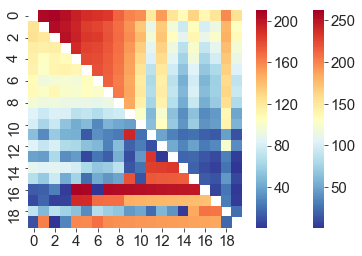

In [65]:
rank_heatmap_data=rank_data.reshape(20,20)
rank_heatmap_model=rank_model.reshape(20,20)
sns.heatmap(rank_heatmap_data,cmap=colormap, mask=np.triu(rank_heatmap_data))
sns.heatmap(rank_heatmap_model,cmap=colormap, mask=np.tril(rank_heatmap_model))

In [72]:
x = np.array([np.nan, 44])
x[~np.isnan(x)]

array([44.])

In [169]:
model_id

'general_energies_no_kPR'

In [170]:
ParamBoyle

array([ 1.31214478, -4.92140591, -2.10218068, -0.18192779,  3.00443021,
        0.30892862,  0.61072301, -3.42722194, -0.22804118,  2.88044723,
        3.79010583,  1.68223951,  0.19994353, -3.75444207,  1.64436202,
        0.83696531,  4.18563129, -6.16944491,  1.54538327,  4.71917344,
        3.43627495,  7.90585782,  4.63181573,  8.8367947 ,  7.59691064,
        5.79252277,  3.87074744,  6.21139636,  4.73913461,  7.61361343,
        5.65230693,  5.53077871,  4.42004506,  4.52243087,  5.04953077,
        4.34747733,  4.13999552,  8.78379747,  2.97480171,  7.75991109,
        2.50910811, -2.40958204,  2.67370734])

In [174]:
np.array(ParamCas9)

array([ 5.23743862, -4.18152913, -3.4080623 ,  3.12711619, -0.21135502,
       -0.30303413,  1.54003666, -3.53361422,  1.45627743, -0.53307251,
        6.14198977,  0.93627065, -0.65638986, -0.5670805 , -4.86771694,
        6.6275488 ,  0.73100132, -1.97401305, -5.25845566,  4.25141765,
        6.15108514,  3.98643167,  2.86252467,  4.30221922,  4.57704366,
        4.09586733,  4.71697676,  4.42689714,  3.34516234,  4.58746527,
        3.30473321,  3.51175881,  3.33550961,  3.34581939,  3.50474691,
        3.33128018,  3.52221104,  9.12762841,  3.63466382,  6.02322255,
        2.18386605, -3.98769398,  2.51333981])

In [17]:
ParamCas9try=[1.3]+ParamCas9[1:]

In [18]:
len(ParamCas9try)

43

12.864869319139723


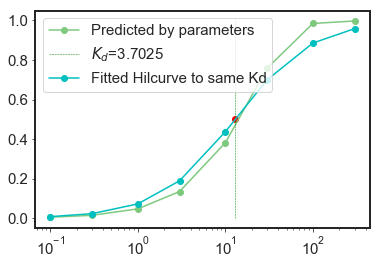

In [138]:
import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
concentrations_f=np.array([0.1,0.3,1,3,10,30,100,300])
Kd,Pbound,_=CalcABA.calc_Pbound(ParamCas9,concentrations_f,1,[],model_id)
print(Kd)
plt.plot(concentrations_f,Pbound,marker='o',label='Predicted by parameters')
plt.plot(Kd*np.ones(10),np.linspace(0,1,10),linewidth=0.5,color='green',linestyle='--',label='$K_d$=3.7025')
Pf=CalcABA.Hill_eq(concentrations_f,Kd)
plt.plot(concentrations_f,Pf,color='c',marker='o',label='Fitted Hilcurve to same Kd')

plt.scatter(Kd,0.5,color='red')
plt.xscale('log')
plt.legend()

In [47]:
Pf

array([0.00771315, 0.02278792, 0.07212473, 0.18909705, 0.43735216,
       0.69987382, 0.88601529, 0.95888043])

In [49]:
Pbound

array([0.0048225 , 0.01439637, 0.04717032, 0.13480812, 0.38169692,
       0.7588283 , 0.98492873, 0.99760106])

In [50]:
Kd

12.864869319139723

In [54]:
from scipy.optimize import curve_fit
Kd_bound, _ = curve_fit(CalcABA.Hill_eq, concentrations,Pbound,maxfev=10000)
Kd_f,_ = curve_fit(CalcABA.Hill_eq, concentrations,Pf,maxfev=10000)
print(Kd_bound)
print(Kd_f)


[12.86486932]
[12.86486932]


In [57]:
#------------To plot weighted average--------
import os
import numpy as np
import pandas as pd
#import Boyle_data_processing as process
#import CRISPR_dCas9_binding_curve_Boyle as dCas9
import matplotlib.pylab as plt
import Prepare_data_Simple as prep

import Calculate_ABA_Finkelsteinlab_Diewertje as ABA

def Weighted_average(row):
    y = np.array(row['ydata'])
    e = np.array(row['yerr'])
    wa=np.average(y, weights=e ** -2, axis=0)
    return wa


def calc_Weighted_average(path='../Data_Boyle/', replica='1', outputdirectory='../Data_Boyle/Weighted_Avarage/',
                          save=True):
    # For me replica is the filename
    xdata, ydata, yerr = prep.Prepare_Cdata(path=path,filename=replica)
    data = pd.DataFrame(columns=['xdata', 'ydata', 'yerr'])
    data['xdata'] = xdata
    data['ydata'] = ydata
    data['yerr'] = yerr
    wa = []
    for i in data.index:
        wa.append(Weighted_average(data.loc[i]))
    WA = pd.DataFrame(columns=['MM_pos', 'WA_data'])
    WA.MM_pos = xdata
    WA.WA_data = wa
    return WA


def predict_train(parameters, model_id='general_energies_no_kPR', path='../Data_Boyle/', replica='1', Plot=True):
    wa = calc_Weighted_average(path=path, replica=replica, save=False)
    prediction=wa.copy()
    concentrations=np.array([0.1,0.3,1.,3.,10.,30.,100.,300.])
    reference=1
    prediction['WA_model']=wa['MM_pos'].apply(lambda x: ABA.calc_ABA(parameters,concentrations,reference,x.tolist(),model_id,guide_length=20,T=10*60))
    score = prediction.dropna().apply(lambda x: np.abs(x['WA_data'] - x['WA_model']) / x['WA_data'], axis=1).mean()
    corr=0
    return score, corr, prediction

percentage=0.1,
model_id='general_energies_no_kPR'
path='../Data_ABA_Finkelsteinlab/'
replica='TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv'

WA=calc_Weighted_average(path,replica,save=False)
WA['WA_data_delta']=WA['WA_data']-2.5545002878227865 
# substract ontarget to go to delta ABA


ontarget ABA is: -1.224730242447112
[2.51742286 2.08287774 2.51833254 2.47005973 2.19040927 1.21771039
 2.24254218 1.41523004 1.78533406 0.51271633 0.43803399 0.1535723
 0.1472607  0.1946558  0.11594947 0.09557068 0.055756   0.02089422
 0.05470392 0.01136207]


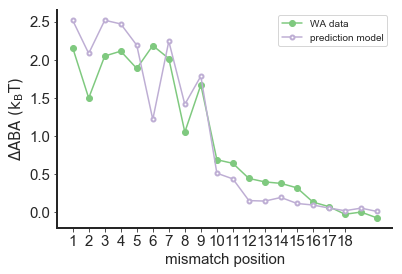

In [60]:
WAsingle=[]
singlePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==1):
        singlePos.append(WA['MM_pos'][i])
        WAsingle.append(WA['WA_data_delta'][i])

WAsingle_ordered=np.empty(len(WAsingle)+1)
for i in range(1,len(WAsingle)+1):
    WAsingle_ordered[singlePos[i-1]]=WAsingle[i-1]
len(WAsingle_ordered)
plt.figure()
plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA data')
_ = pltS.predict_single_mm(ParamBoyle,model_id, T, guide_length, show_plot=True, show_data=False, data_file=Cas9)
plt.legend()

Text(0.5, 1.0, 'Prediction (top) / WA (bottom)')

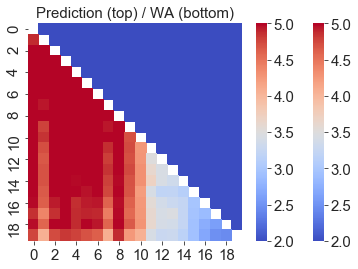

In [64]:
#-----For double mismatches-----
WAdouble=[]
doublePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==2):
        doublePos.append(WA['MM_pos'][i])
        WAdouble.append(WA['WA_data'][i])
mapABA=np.zeros([20,20])
mapABA[:]=np.nan
for i in range(len(doublePos)):
    mapABA[doublePos[i][0]-1,doublePos[i][1]-1]=WAdouble[i]

import seaborn as sns
plt.figure()
best_heatmap = pltABA.predict_double_mm(ParamBoyle,model_id,T, guide_length, show_plot=True, show_data=False, data_file=Cas9)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=True, vmin=2,vmax=5)
plt.title('Prediction (top) / WA (bottom)',fontsize=15)

In [65]:
best_heatmap

array([[ 1.29269262,  1.31193545,  1.31214623,  1.31212788,  1.31200685,
         1.31119787,  1.3120291 ,  1.31143695,  1.31174875,  1.30829902,
         1.30760446,  1.30192065,  1.30164739,  1.30315226,  1.30019111,
         1.29919184,  1.2966956 ,  1.29437265,  1.29671473,  1.29362229],
       [ 1.31193545,  0.85814749,  1.30478071,  1.30429872,  1.30113127,
         1.28009692,  1.30171371,  1.28629178,  1.29439968,  1.20785481,
         1.19113494,  1.0590461 ,  1.05314975,  1.08798688,  1.02126989,
         0.99912303,  0.94668389,  0.89424651,  0.94522232,  0.87810263],
       [ 1.31214623,  1.30478071,  1.29360229,  1.30399856,  1.30395117,
         1.30363034,  1.30396042,  1.30372591,  1.30384964,  1.30244607,
         1.30215169,  1.2994203 ,  1.29928327,  1.3001067 ,  1.29850189,
         1.29791977,  1.29637335,  1.29480528,  1.29639142,  1.29427482],
       [ 1.31212788,  1.30429872,  1.30399856,  1.24532949,  1.30307725,
         1.30195191,  1.30310814,  1.30228994,  

In [130]:
model_id = 'general_energies_no_kPR'
# filename = simset[np.argsort(chi_squared)[3]]
# filename = simset[0]
filename = '../Energy_Landscape_dCas9/fits_Stijn/16_5_2019/fit_16_5_2019_sim_2.txt'
SAfit = pd.read_csv(filename, delimiter='\t',index_col=39)
SAfit.reset_index(inplace=True)
best_solution = np.argmin(SAfit.Potential)

Nparams = 36
parameters = load_simm_anneal(filename, Nparams,fatch_solution=best_solution)


# --- split into parameters fitted using dCas9 and Cas9 (Nucleaseq is done under saturating conditions) --- 
Cas_params = np.append(parameters[0:33],parameters[34:36])
dCas_params = np.array(parameters[0:35])
ID_dCas = "On_edit_boyle_landscape" 
ID_Cas  = "Clv_Saturated_edit_boyle_landscape"


# dCas_params[-1] += 2
# Cas_params[-2] += 2 
# Cas_params[-1] += 90 

# --- get epsilon and forward rates ---- 
epsilon, forward_rates = read_model_ID.unpack_parameters(dCas_params, model_id=ID_dCas)


# --- binding rate at 10nM--- 
kon = forward_rates[0]


# --- internal forward rate --- 
kf = forward_rates[1]



# --- catalytic rate ----
_,forward_rates = read_model_ID.unpack_parameters(Cas_params, model_id=ID_Cas)
kcat = forward_rates[-1]



print("rates: ", (kon, kf, kcat))


FileNotFoundError: [Errno 2] File b'../Energy_Landscape_dCas9/fits_Stijn/16_5_2019/fit_16_5_2019_sim_2.txt' does not exist: b'../Energy_Landscape_dCas9/fits_Stijn/16_5_2019/fit_16_5_2019_sim_2.txt'

# Plot difference methods Finkelstein and Boyle

C:\Users\Diewertje\Python\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


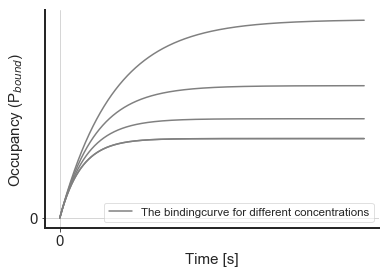

In [6]:
t=np.arange(0,9000,10)
t_b=np.array([500,1000,1500])
t_f=8000
order=10**-3.5
corr=0.1 #0.1
k_array=[2,3,4,5]
colPlot='gray'
colF='lime'
colMB='blue'
colFB='cyan'

for k in k_array:
    a=(1-np.exp(-k*order*t))*1/(k*corr)
    f=(1-np.exp(-k*order*t_f))*1/(k*corr)
    plt.plot(t,a,color=colPlot)
    #plt.scatter(t_f,f,color=colF)
#plt.scatter(t_f,f,color=colF, label='Measurements Finkelstein')
plt.plot(t,a,color=colPlot,label='The bindingcurve for different concentrations')
for k in [k_array[0]]:
    b=(1-np.exp(-k*order*t_b))*1/(k*corr)
    #plt.scatter(t_b,b,color=colMB,label='Measurements Boyle')
    rateBoyle,_,_,_=np.linalg.lstsq(t_b[:,np.newaxis],b)
    #plt.plot([0]+t_b.tolist()+[2000],rateBoyle*np.array([0]+t_b.tolist()+[2000]),'b')
#plt.plot([0]+t_b.tolist()+[2000],rateBoyle*np.array([0]+t_b.tolist()+[2000]),colFB,label='Fitted rate Boyle')
plt.yticks([0]) 
plt.xticks([0])
plt.xlabel('Time [s]',fontsize=15)
plt.ylabel('Occupancy (P$_{bound}$)',fontsize=15)
plt.grid()
sns.despine()
plt.legend(fancybox=True,framealpha=0.6,fontsize=11.5)

C:\Users\Diewertje\Python\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


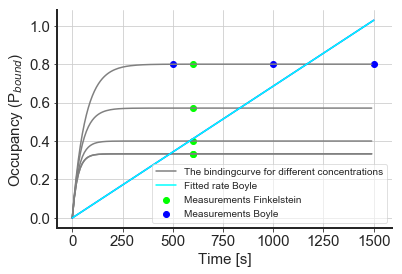

In [70]:
t=np.arange(0,1500,10)
t_b=np.array([500,1000,1500])
t_f=600
order=10**-3.5
corr=0.025 #0.1
k_array=[50,70,100,120]
#mycmap = cm.get_cmap('Accent')
colPlot='gray'
colF='lime'
colMB='blue'
colFB='cyan'
for k in k_array:
    a=(1-np.exp(-k*order*t))*1/(k*corr)
    f=(1-np.exp(-k*order*t_f))*1/(k*corr)
    plt.plot(t,a,color=colPlot)
    plt.scatter(t_f,f,color=colF)
plt.scatter(t_f,f,color=colF, label='Measurements Finkelstein')
plt.plot(t,a,color=colPlot,label='The bindingcurve for different concentrations')
for k in [k_array[0]]:
    b=(1-np.exp(-k*order*t_b))*1/(k*corr)
    plt.scatter(t_b,b,color=colMB,label='Measurements Boyle')
    rateBoyle,_,_,_=np.linalg.lstsq(t_b[:,np.newaxis],b)
    plt.plot([0]+t_b.tolist()+[1500],rateBoyle*np.array([0]+t_b.tolist()+[1500]),'b')
plt.plot([0]+t_b.tolist()+[1500],rateBoyle*np.array([0]+t_b.tolist()+[1500]),colFB,label='Fitted rate Boyle')
#plt.yticks([0]) 
#plt.xticks([0])
plt.xlabel('Time [s]',fontsize=15)
plt.ylabel('Occupancy (P$_{bound}$)',fontsize=15)
plt.grid()
sns.despine()
plt.legend(fancybox=True,framealpha=0.6,fontsize=10,loc=4)

In [64]:
mycmap

In [175]:
[0,t_b.tolist()]

[0, [500, 1000, 1500]]

In [129]:
rateBoyle=stats.linregress(t[:4],a[:4])

In [130]:
rateBoyle

LinregressResult(slope=0.0006219166775635759, intercept=0.24453007325181475, rvalue=0.8404289925589383, pvalue=0.15957100744106156, stderr=0.00028356505249337347)

In [147]:
a

array([0.        , 0.39346934, 0.63212056, 0.77686984, 0.86466472,
       0.917915  , 0.95021293, 0.96980262, 0.98168436])

In [148]:
a[1:4,np.newaxis]

array([[0.39346934],
       [0.63212056],
       [0.77686984]])

In [139]:
type(a)

numpy.ndarray